# 1.工具库

In [6]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# 2.构建数据

In [3]:
# load data, split between train and test datasets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("x_train shape before expand:", x_train.shape)
print(x_train.shape[0], "train samples before expand.")
print(x_test.shape[0], "test samples before expand .")

# expand images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples.")
print(x_test.shape[0], "test samples.")

# convert class vectors to binary class matrices
print("y_train shape:", y_train.shape)
print(y_train.shape[0], "train labels.")
print(y_test.shape[0], "test labels.")
print("y_train[0]", y_train[0])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("y_train shape:", y_train.shape)
print(y_train.shape[0], "train labels.")
print(y_test.shape[0], "test labels.")
print("y_train[0]", y_train[0])

x_train shape before expand: (60000, 28, 28)
60000 train samples before expand.
10000 test samples before expand .
x_train shape: (60000, 28, 28, 1)
60000 train samples.
10000 test samples.
y_train shape: (60000,)
60000 train labels.
10000 test labels.
y_train[0] 5
y_train shape: (60000, 10)
60000 train labels.
10000 test labels.
y_train[0] [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# 3.构建模型

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0         
_________________________________________________________________
dropout (Dropout)            (None, 7744)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                77450     
Total params: 96,266
Trainable params: 96,266
Non-trainable params: 0
____________________________________________________

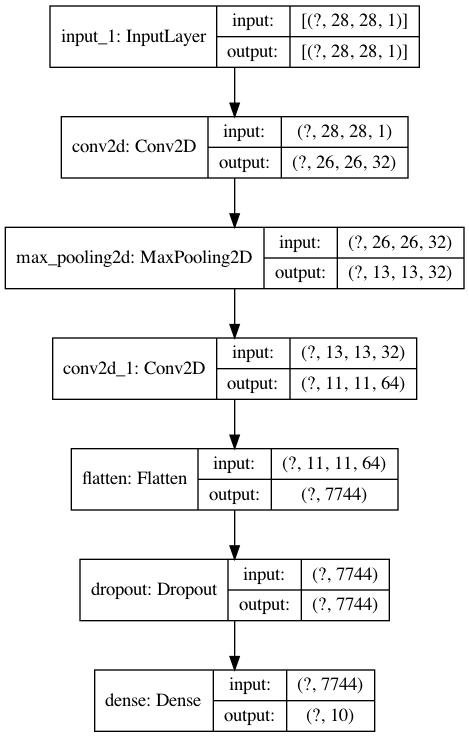

In [4]:
num_classes = 10
input_shape = (28, 28, 1)

model = keras.Sequential(
    [
        keras.Input(shape = input_shape),
        layers.Conv2D(32, kernel_size = (3, 3), activation = "relu"),
        layers.MaxPooling2D(pool_size = (2, 2)),
        layers.Conv2D(64, kernel_size = (3, 3), activation = "relu"),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation = "softmax"),
    ]
)
model.summary()
keras.utils.plot_model(model, show_shapes = True)

# 4.模型训练

In [12]:
batch_size = 128
epochs = 15

model.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"],
)
model.fit(
    x_train, y_train, 
    batch_size = batch_size, 
    epochs = epochs, 
    validation_split = 0.1
)

Epoch 1/15
422/422 [==============================] - 10s 25ms/step - loss: 0.2620 - accuracy: 0.9234 - val_loss: 0.0777 - val_accuracy: 0.9792
Epoch 2/15
422/422 [==============================] - 11s 26ms/step - loss: 0.0840 - accuracy: 0.9745 - val_loss: 0.0571 - val_accuracy: 0.9860
Epoch 3/15
422/422 [==============================] - 11s 26ms/step - loss: 0.0635 - accuracy: 0.9808 - val_loss: 0.0531 - val_accuracy: 0.9858
Epoch 4/15
422/422 [==============================] - 11s 27ms/step - loss: 0.0531 - accuracy: 0.9836 - val_loss: 0.0395 - val_accuracy: 0.9903
Epoch 5/15
422/422 [==============================] - 12s 29ms/step - loss: 0.0452 - accuracy: 0.9853 - val_loss: 0.0421 - val_accuracy: 0.9882
Epoch 6/15
422/422 [==============================] - 45s 106ms/step - loss: 0.0406 - accuracy: 0.9868 - val_loss: 0.0371 - val_accuracy: 0.9898
Epoch 7/15
422/422 [==============================] - 45s 108ms/step - loss: 0.0355 - accuracy: 0.9885 - val_loss: 0.0373 - val_accurac

# 5.模型评估

In [13]:
score = model.evaluate(x_test, y_test, verbose = 0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02892857976257801
Test accuracy: 0.9912999868392944
